In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


Dataset:


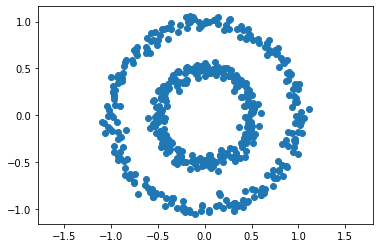

Solution:


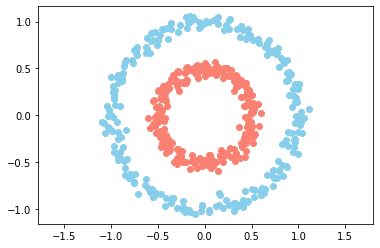

In [ ]:
# CREAR EL DATASET

n = 500           #Amount of samples in our dataset (i.e. 500 people)
p = 2             #Number of characteristics of every sample (ej. age y height)

#This function generates the dataset. X = input. Y = output.
#The factor would set the distance between the 2 circles
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

#This loads a 2d graph to visualizate the data of the sample
#
print("Dataset:")
plt.scatter(X[:,0],X[:,1])
plt.axis("equal")
plt.show()
print("Solution:")
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

#This would be the dataset on the graph, and the solution.

In [ ]:
#First, we will define a class that refers to a neural layer

# CLASS FOR THE NEURAL NETWORK LAYER

# y = w1x1 + w2x2 + b

class neural_layer():
  #Class inizializator
  #@Var, w[] weight for the weighted sum
  #@Var, b[] bias
  #@Param, n_conn number of connection
  #@Param, n_neur number of neurons
  #@Param, act_f activation function

  def __init__ (self, n_conn, n_neur, act_f):

    self.act_f = act_f

    # b will be a "column" vector ( 1 x n_neur matrix)
    self.b = np.random.rand(1, n_neur) * 2 - 1
    # for w it will be a n_conn x n_neur matrix
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

Sigmoid funct blue, relu orange


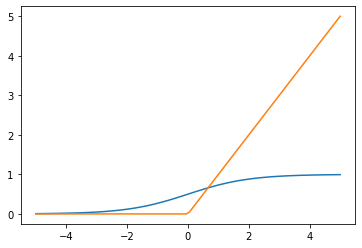

In [ ]:
# ACTIVATION FUNCTIONS

#Sigmoid function [0] and derivative of sigmoid function (1)
sigm = (lambda x: 1 / (1 + np.e ** (-x)), 
      lambda x: x * (1 - x))  

relu = lambda x: np.maximum(0,x)

#This is just a graphical representation of the sigmoid funcion
_x = np.linspace(-5, 5, 100)
print("Sigmoid funct blue, relu orange")
plt.plot(_x,sigm[0](_x))
plt.plot(_x,relu(_x))

In [ ]:
# Let's create the layers
# l0 = neural_layer(p, 4, sigm)
# l1 = neural_layer(4, 8, sigm)
# ...

# ...or lets better iterate

# This function creates the neural network as a data structure
# Arbitrary number of neurons for each layer. 
# To make it simple, we will use the same activation function and learning rate
# on all layers.

# topology = [p, 4, 8, 16, 8, 4, 1]

def create_nn(topology, act_f,):

  # nn stands for neural network that contains the layers of the nn
  nn = []

  # [:-1] means that it should go through all values of topology[] but the last
  # one.
  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

# For now on, this would create a neural network as a data structure
# following the topology defined and an activation function
#create_nn(topology, sigm)

In [ ]:
# Reload some variables (just for testing)
#neural_net = []
#nn = []

In [ ]:
# LEARNING FUNCTION
# 1. Forward pass: Input vector gets processed layer after layer
#     1.1 weighted sum + bias
#     1.2 activation function
# 2. Result is compared with Y value (cost function). This will return an 
#    error value. Then, we will backpropagate to calc the partial derivatives.
# 3. Gradient descent to optimize the cost function.

topology = [p, 4, 8, 16, 8, 4, 1]

neural_net = create_nn(topology, sigm)

# [0] Cost function Yp stands for Y prediction. Yr stands for Y real.
# We will use the mean cuadratic error.
# [1] would be the derivative of the cost function
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

# Learning rate (lr) 
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  # Forward pass explanation
  # @ is a matrix product.
  # z is the weighted sum + bias
  # a is the activation function
  # z = X @ neural_net[0].W + neural_net[0].b
  # a = neural_net[0].act_f[0](z)

  # When we pass the input through the first layer, we will get an output
  # that should be passed through the second layer and so on... so lets iterate

  # Forward pass:

  out = [(None, X)]

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]


      if l == len(neural_net)-1:
        # Calc last layer delta
      else
        # Calc delta of each respective previous layer

    # Gradient descent

train(neural_net, X, Y, l2_cost, 0.5,True)

IndentationError: ignored